<a href="https://colab.research.google.com/github/hmdfaiz/Ride-Hailing-Data-Analysis/blob/main/Ride_Hailing_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [7]:
df = pd.read_csv('/content/Uber Drives - 2016.csv')

In [8]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
df.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [13]:
df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  653 non-null    object 
 1   END_DATE*    653 non-null    object 
 2   CATEGORY*    653 non-null    object 
 3   START*       653 non-null    object 
 4   STOP*        653 non-null    object 
 5   MILES*       653 non-null    float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


In [23]:
#Converting two date time columns to approriate formats
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format = '%m/%d%y %H:%M')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'],  format = '%m/%d%y %H:%M')

In [24]:
#Create lists that going to store date and time
hour = []
day = []
dayofweek = []
monthno = []
month = []
weekday = []

for x in df['START_DATE*']:
  hour.append(x.hour)
  day.append(x.day)
  dayofweek.append(x.dayofweek)
  monthno.append(x.month)
  month.append(calendar.month_name[monthno[-1]])
  weekday.append(calendar.day_name[dayofweek[-1]])

df['Hour'] = hour
df['Day'] = day
df['Day Of Week'] = dayofweek
df['Month'] = month
df['Weekday'] = weekday

In [25]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Day,Day Of Week,Month,Weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,January,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,January,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,January,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,January,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,January,Wednesday


# Check Category

In [26]:
df['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

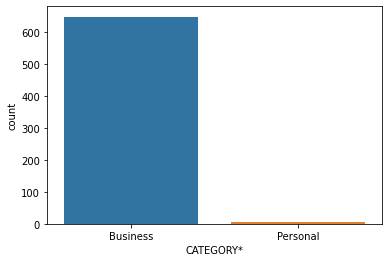

In [27]:
sns.countplot(x='CATEGORY*', data = df)

# How long do people travel with the service?

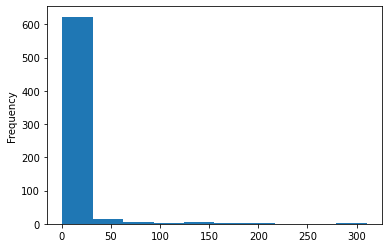

In [28]:
df['MILES*'].plot.hist()

# What hour do most people use the service to their destination?

Text(0, 0.5, 'Frequency')

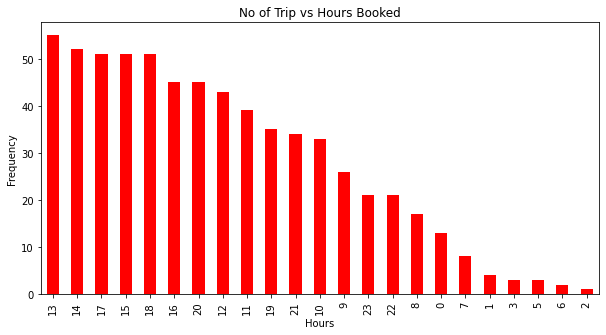

In [29]:
PeakHours = df ['START_DATE*'].dt.hour.value_counts()
PeakHours.plot(kind = 'bar', color = 'red', figsize = (10,5))

plt.title ('No of Trip vs Hours Booked')
plt.xlabel('Hours')
plt.ylabel('Frequency')

# Check the purpose people booked the service

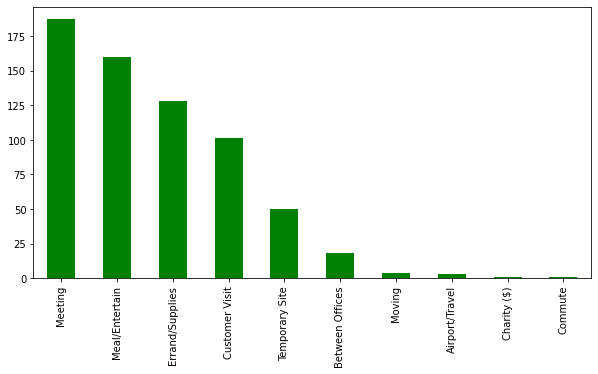

In [30]:
df['PURPOSE*'].value_counts().plot(kind = 'bar', color = 'green', figsize = (10,5))

# Which Day has the highest number of trip?

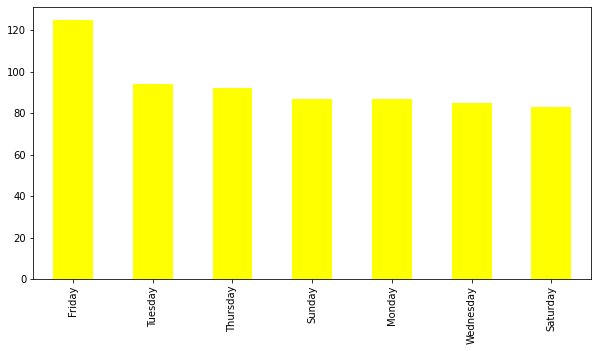

In [31]:
df['Weekday'].value_counts().plot(kind = 'bar', color = 'yellow', figsize = (10,5))

# Number of trip per day

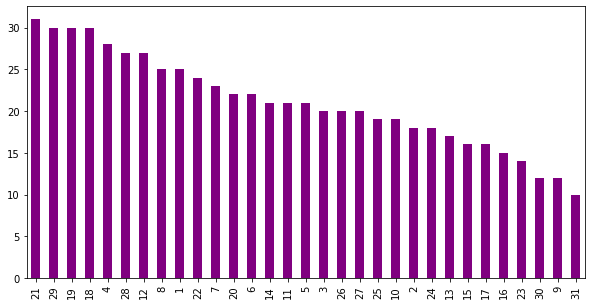

In [32]:
df['Day'].value_counts().plot(kind = 'bar', color = 'purple', figsize = (10,5))

# Trips per Month

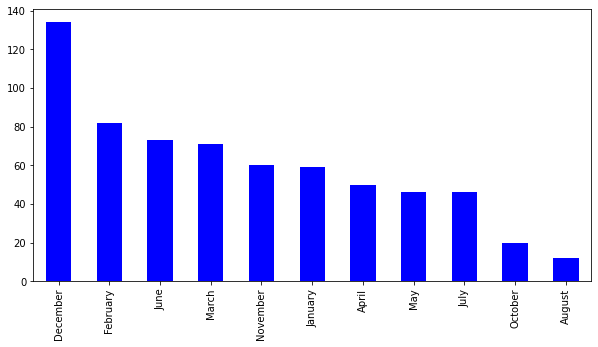

In [33]:
df['Month'].value_counts().plot(kind = 'bar', color = 'blue', figsize = (10,5))

# The 10 most starting point booked for the service

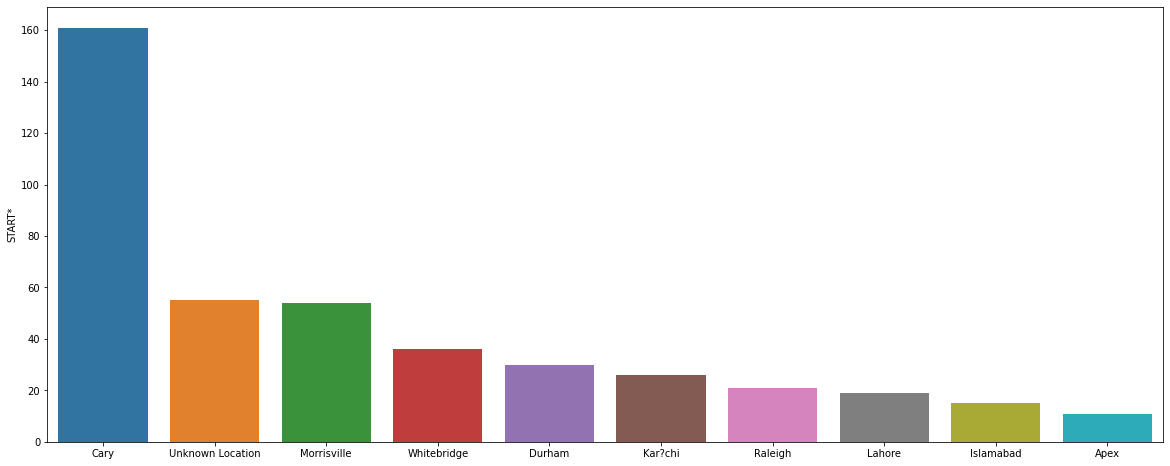

In [34]:
#df['START*'].value_counts().plot(kind = 'bar', color = 'red', figsize = (30,5))

plt.figure(figsize  = (20,8))
startingPoint = df['START*'].value_counts()
x = startingPoint.nlargest(10).index
y = startingPoint.nlargest(10)
sns.barplot(x = x, y = y)